# Assignment 2 - Clustering

Some basic code has been provided for you. You will need to make some small edits to complete the tasks in the instructions document. 

Feel free to write additional code as needed to support/illuminate your discussion in your report.

In [245]:
import numpy as np
from numpy import unique  # can also just use np.unique
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

# Task 1

Load in the <code>salary_data.csv</code> dataset which has 50 data points and two dimensions (age, salary).

Randomly generate a dataset with <b>50</b> data points using the <code>generate_random_data</code> method below.

Run kmeans 10 times on each dataset.

#### Import Salary Dataset

In [2]:
salary_data = pd.read_csv('data/salary_data.csv')
print(salary_data.shape)
salary_data.head(5)

(49, 2)


,age,income
0,14,2500
1,15,5500
2,16,5000
3,15,4500
4,16,2000


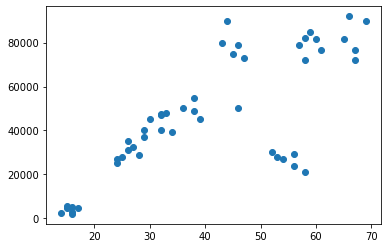

In [3]:
plt.scatter(salary_data.age, salary_data.income)

#### 1.1 Generate Random Data

In [4]:
def generate_random_data(n):
    '''function to generate n random 2D data points stored in an (n, 2) dataframe'''
    return pd.DataFrame({'x':np.random.rand(n), 'y':np.random.rand(n)})

Every time you run the <code>generate_random_data</code> function you will generate a new dataset so make sure you assign your dataset to a variable and don't write over that variable unless you're finished with it.

In [5]:
########## EVERY TIME YOU RUN THIS YOU WILL GENERATE NEW DATA ##########
rand_data = generate_random_data(50)

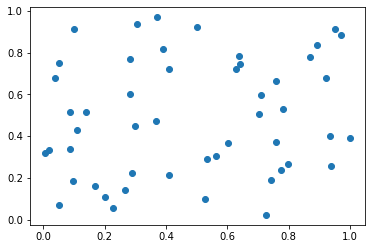

In [132]:
plt.scatter(rand_data.x, rand_data.y)

#### 1.2 Run K-means
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [112]:
# KMeans Function
def run_kmeans(k, dataset, x_col='', y_col=''):
    # Making a copy of the dataframe so we can freely add columns
    df = dataset.copy(deep=True) # For our use case
    kmeans = KMeans(n_clusters=k, init='random', n_init=1) # Random because KMeans
    kmeans.fit(dataset) # Compute k-means clustering
    cluster_labels = kmeans.fit_predict(dataset) # Compute cluster centers and predict cluster index for each sample.
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    centroids = kmeans.cluster_centers_ # Find the coordinates of the centroid
    print("SSE: ", kmeans.inertia_) # Compute the SSE Value to determine which cluster is the best 
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 30, color = 'r') # PLot the centroids
    plt.show()
    return df

SSE:  3061733564.994486


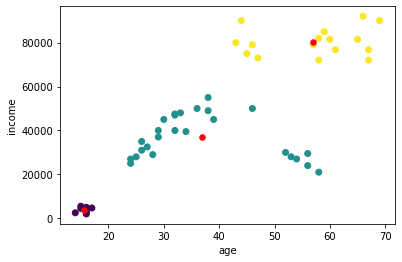

SSE:  8471513255.487657


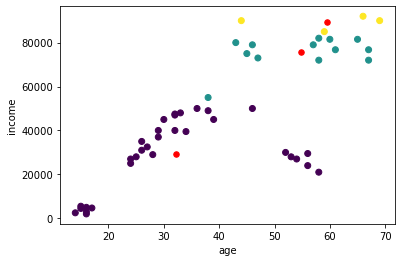

SSE:  3584375103.28571


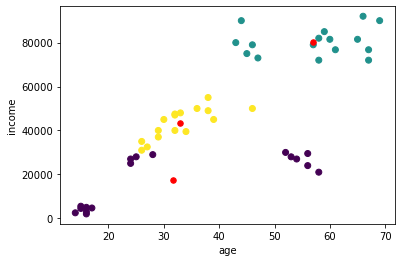

SSE:  3599959628.673801


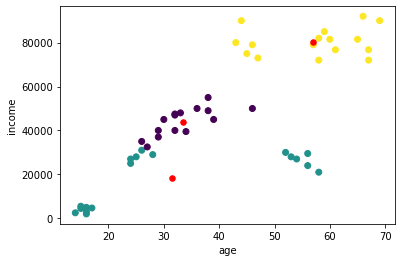

SSE:  3061733564.994486


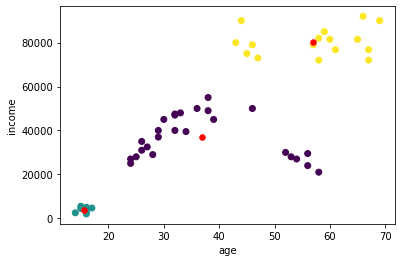

SSE:  3054334948.967023


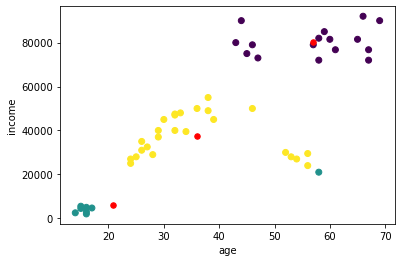

SSE:  3054334948.967023


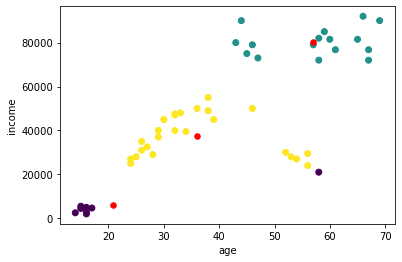

SSE:  3599959628.673801


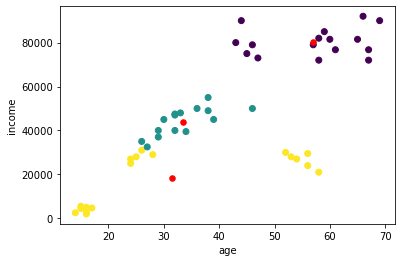

SSE:  3061733564.994486


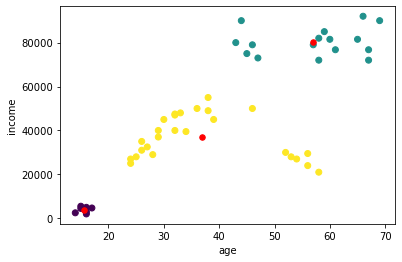

SSE:  3061733564.994486


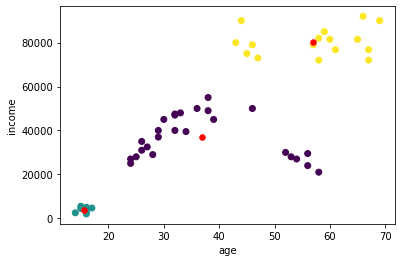

In [137]:
run_1_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_2_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_3_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_4_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_5_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_6_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_7_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_8_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_9_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_10_df = run_kmeans(3, salary_data, x_col='age', y_col='income')

SSE:  1097271881.2431104


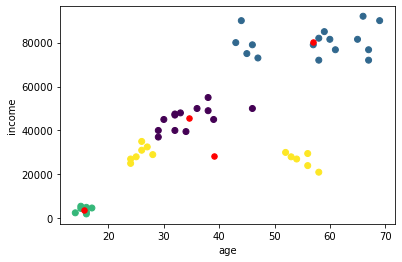

In [147]:
run_df_pp = run_kmeanspp(4, salary_data, x_col='age', y_col='income')


SSE:  2.6924514936905144


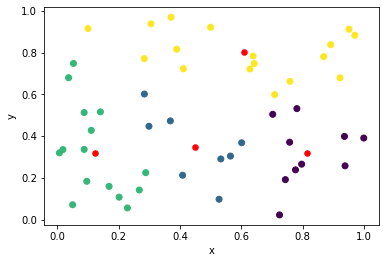

SSE:  1.7730999463552877


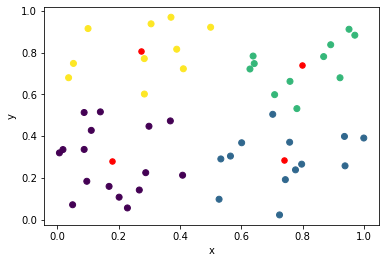

SSE:  1.7782133968318512


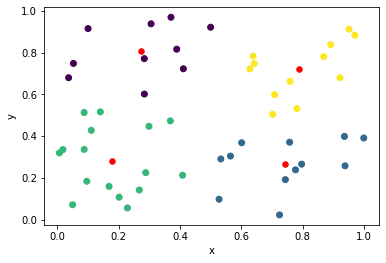

SSE:  1.7782133968318512


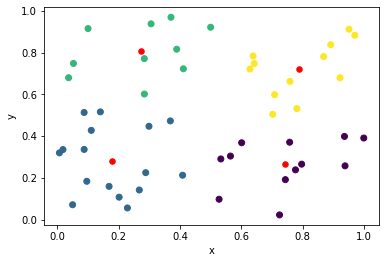

SSE:  1.7730999463552877


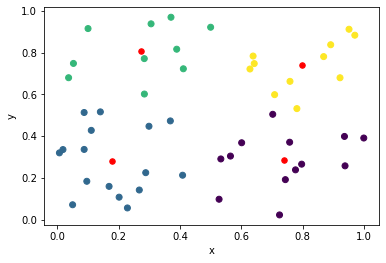

SSE:  1.7730999463552877


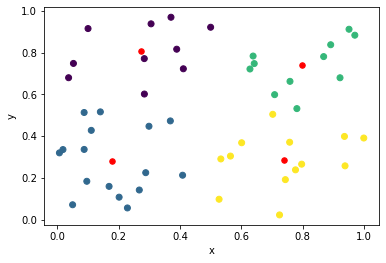

SSE:  1.7730999463552877


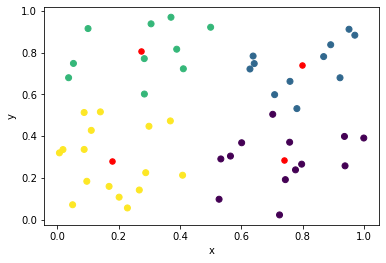

SSE:  1.7730999463552877


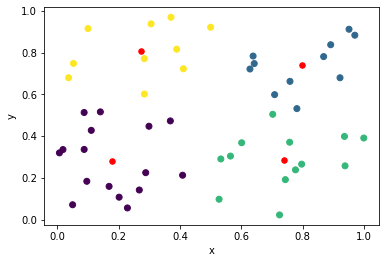

SSE:  1.7782133968318512


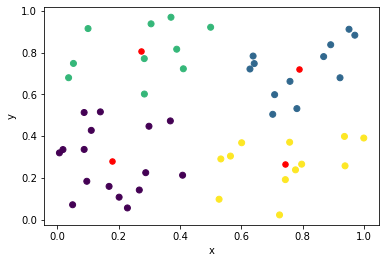

SSE:  1.7730999463552877


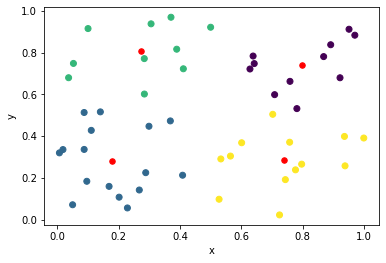

In [135]:
print()
rand_run_1_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_2_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_3_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_4_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_5_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_6_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_7_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_8_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_9_df = run_kmeans(4, rand_data, x_col='x', y_col='y')
rand_run_10_df = run_kmeans(4, rand_data, x_col='x', y_col='y')

In [186]:
# KMeans++ Clustering Algorithm 
def run_kmeanspp(k, dataset, x_col='', y_col=''):
#     df = dataset.copy(deep=True)
    df = dataset.copy()
    # Modified the init method
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1) 
    kmeans.fit(dataset)
    cluster_labels = kmeans.fit_predict(dataset)
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    centroids = kmeans.cluster_centers_
    # Print the SSE Value
    print("SSE: ", kmeans.inertia_)
    # Plotting Centroids
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 30, color = 'r')
    plt.show()
    return df

SSE:  3054334948.967023


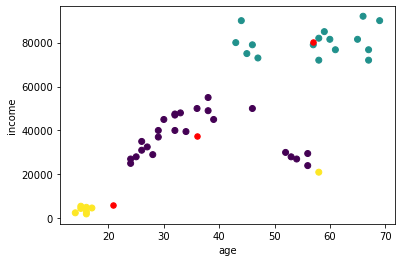

SSE:  1088268281.9506938


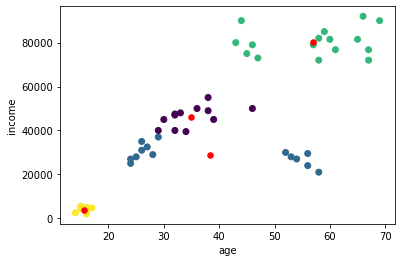

In [138]:
run_df = run_kmeanspp(3, salary_data, x_col='age', y_col='income')

SSE:  1.7730999463552877


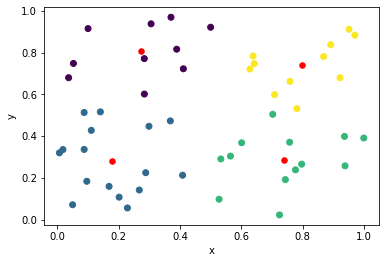

SSE:  2.956968180840182


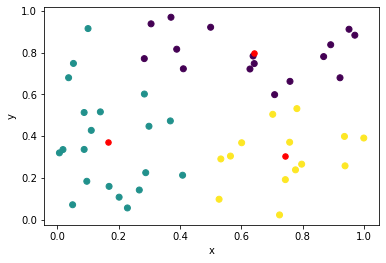

In [139]:
rand_run_df = run_kmeanspp(4, rand_data, x_col='x', y_col='y')
rand_run_df_3 = run_kmeanspp(3, rand_data, x_col='x', y_col='y')

### Elbow Method

In [118]:
def get_elbow_plot(dataset, x_col='', y_col='', min_k=1, max_k=10):
    
    # for what values of k do we want to run
    k_range = range(min_k, max_k)

    # calculate sum of squared error for each value of k
    sse = [] # initialze empty list

    for k in k_range:
        km = KMeans(n_clusters=k) # set whatever other parameters you want here
        km.fit(dataset)
        sse.append(km.inertia_)

    plt.xlabel('K')
    plt.ylabel('Sum of Squared Error')
    plt.plot(k_range, sse)
    plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


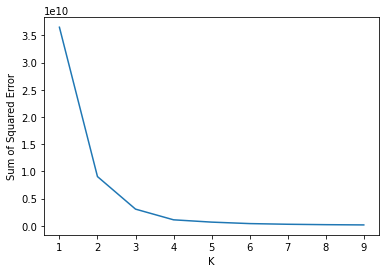

In [148]:
get_elbow_plot(salary_data, x_col='age', y_col='income')

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


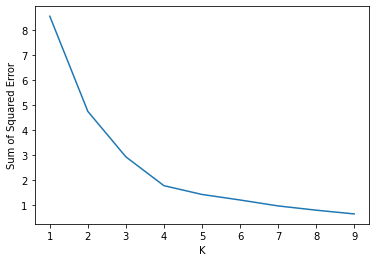

In [120]:
get_elbow_plot(rand_data, x_col='x', y_col='y')

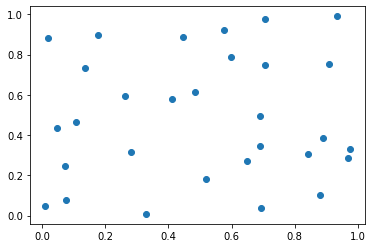

In [143]:
from sklearn.datasets import make_blobs
# create your own dataset of 30 points
my_rand_data = generate_random_data(30)
plt.scatter(my_rand_data.x, my_rand_data.y)

In [215]:
print(my_rand_data)
print(type(my_rand_data))

           x         y
0   0.010230  0.049624
1   0.574773  0.921911
2   0.444773  0.886089
3   0.706876  0.978634
4   0.282037  0.313759
5   0.135612  0.731510
6   0.843385  0.306758
7   0.071884  0.248907
8   0.974342  0.329369
9   0.411726  0.579209
10  0.880103  0.101962
11  0.076750  0.078565
12  0.107511  0.464972
13  0.967723  0.285521
14  0.705329  0.747611
15  0.907236  0.752853
16  0.329531  0.008300
17  0.263825  0.593696
18  0.018967  0.882255
19  0.597745  0.786350
20  0.647450  0.269886
21  0.483102  0.612455
22  0.177320  0.899385
23  0.046367  0.434655
24  0.517849  0.180166
25  0.688916  0.495086
26  0.691387  0.343804
27  0.934522  0.990771
28  0.693663  0.037243
29  0.889606  0.384505
<class 'pandas.core.frame.DataFrame'>


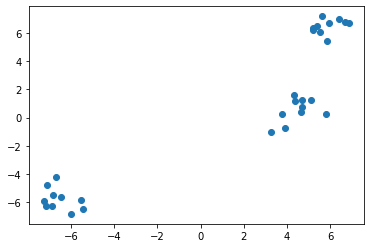

In [214]:
features, clusters = make_blobs(n_samples = 30,
                  n_features = 3, 
                  centers = 3,
                  cluster_std = 0.7,
                  shuffle = True)
plt.scatter(features[:,0], features[:,1])
plt.show()

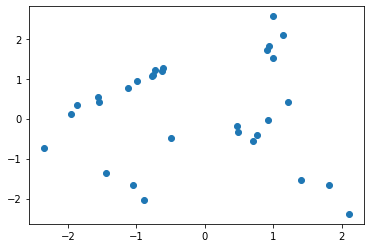

In [159]:
data_values_30, class_labels_30 = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=None)
plt.scatter(data_values_30[:,0], data_values_30[:,1])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


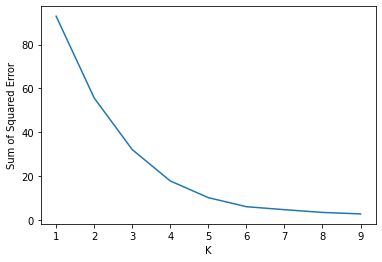

In [226]:
get_elbow_plot(data_values_30, x_col='x', y_col='y')

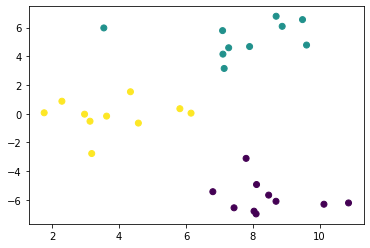

In [237]:
n_samples = 30
random_state = 150

# Unequal variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.5, 1.5], random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c = y_varied)
# plt.scatter(X_varied[:, 0], X_varied[:, 1])
# plt.title("Unequal Variance")
plt.show()

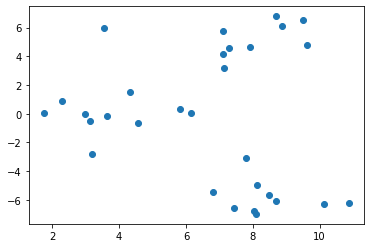

In [240]:
# using make_blobs to generate dataset
n_samples = 30 # number of data points
random_state = 150 # to have reproducable data points
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.5, 1.5], random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1])
plt.show()

In [211]:
flat = list(x for x in X_varied)
print(type(flat))
print(flat)

<class 'list'>
[array([5.81747368, 0.34685236]), array([ 8.69405305, -6.10169962]), array([7.00629232, 2.60617111]), array([ 7.4384769 , -6.55535211]), array([ 8.03673643, -6.79029062]), array([ 3.17938957, -2.77601303]), array([7.18595633, 4.52645918]), array([ 8.11153644, -4.93486131]), array([4.33836824, 1.52568333]), array([10.2935622 ,  4.77814282]), array([ 6.80393399, -5.43308526]), array([6.95665805, 3.93604479]), array([2.28710056, 0.86684761]), array([10.86453815, -6.21643658]), array([6.94284923, 6.12022208]), array([ 8.47458152, -5.67139349]), array([ 3.62454215, -0.17037898]), array([9.07974743, 7.45339571]), array([1.75645088, 0.06152722]), array([8.02015802, 4.63892281]), array([10.12899447, -6.30692795]), array([2.20460795, 6.36791029]), array([10.13225657,  7.1408749 ]), array([ 8.09831897, -6.98150365]), array([9.3211819, 6.5168333]), array([6.15152925, 0.03674133]), array([ 4.57542968, -0.65525985]), array([ 3.12829552, -0.52585666]), array([ 2.9654359 , -0.03526202]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


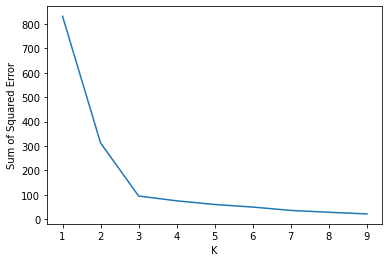

In [239]:
# generate an elbow plot for the data
get_elbow_plot(X_varied, x_col='x', y_col='y')

In [218]:
print(X_varied)
print(type(X_varied))
# flat_list = X_varied.tolist()
# print(flat_list)
# print(type(flat_list))
df2 = pd.DataFrame(X_varied)
print(df2)
print(type(df2))
run_df_extra_hello = run_kmeanspp(3, df2)

[[ 5.81747368  0.34685236]
 [ 8.69405305 -6.10169962]
 [ 7.00629232  2.60617111]
 [ 7.4384769  -6.55535211]
 [ 8.03673643 -6.79029062]
 [ 3.17938957 -2.77601303]
 [ 7.18595633  4.52645918]
 [ 8.11153644 -4.93486131]
 [ 4.33836824  1.52568333]
 [10.2935622   4.77814282]
 [ 6.80393399 -5.43308526]
 [ 6.95665805  3.93604479]
 [ 2.28710056  0.86684761]
 [10.86453815 -6.21643658]
 [ 6.94284923  6.12022208]
 [ 8.47458152 -5.67139349]
 [ 3.62454215 -0.17037898]
 [ 9.07974743  7.45339571]
 [ 1.75645088  0.06152722]
 [ 8.02015802  4.63892281]
 [10.12899447 -6.30692795]
 [ 2.20460795  6.36791029]
 [10.13225657  7.1408749 ]
 [ 8.09831897 -6.98150365]
 [ 9.3211819   6.5168333 ]
 [ 6.15152925  0.03674133]
 [ 4.57542968 -0.65525985]
 [ 3.12829552 -0.52585666]
 [ 2.9654359  -0.03526202]
 [ 7.79921304 -3.11280008]]
<class 'numpy.ndarray'>
            0         1
0    5.817474  0.346852
1    8.694053 -6.101700
2    7.006292  2.606171
3    7.438477 -6.555352
4    8.036736 -6.790291
5    3.179390 -2.7760

KeyError: ''

#### Normalize salary data

In [228]:
scaler = MinMaxScaler()
scaler.fit(salary_data[['age']])
salary_data['normalized_age'] = scaler.transform(salary_data[['age']])
salary_data.head()

,age,income,normalized_age,normalized_income,normalized_cluster
0,14,2500,0.000000,0.005556,1
1,15,5500,0.018182,0.038889,1
2,16,5000,0.036364,0.033333,1
3,15,4500,0.018182,0.027778,1
4,16,2000,0.036364,0.000000,1


In [229]:
scaler = MinMaxScaler()
scaler.fit(salary_data[['income']])
salary_data['normalized_income'] = scaler.transform(salary_data[['income']])
salary_data.head()

,age,income,normalized_age,normalized_income,normalized_cluster
0,14,2500,0.000000,0.005556,1
1,15,5500,0.018182,0.038889,1
2,16,5000,0.036364,0.033333,1
3,15,4500,0.018182,0.027778,1
4,16,2000,0.036364,0.000000,1


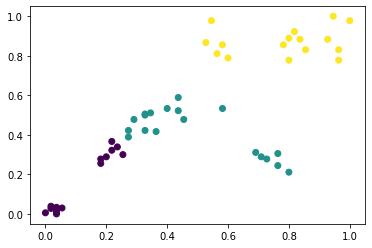

In [230]:
km = KMeans(n_clusters=3, ) # or whatever number of k you want
cluster_labels = km.fit_predict(salary_data[['normalized_age', 'normalized_income']])
salary_data['normalized_cluster'] = cluster_labels
plt.scatter(salary_data.normalized_age, salary_data.normalized_income, c=km.labels_.astype(float))

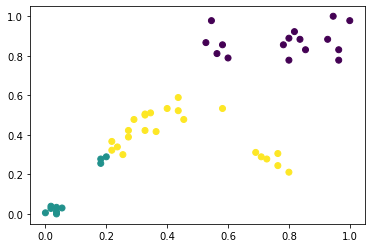

In [232]:
km2 = KMeans(n_clusters=3, init='k-means++', n_init=1) # or whatever number of k you want
cluster_labels = km2.fit_predict(salary_data[['normalized_age', 'normalized_income']])
salary_data['normalized_cluster'] = cluster_labels
plt.scatter(salary_data.normalized_age, salary_data.normalized_income, c=km2.labels_.astype(float))


# Task 2 

We'll use Sklearn's <code>make_classification</code> method to generate a dataset. See documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

We aren't interested in the labels per-se, but it will generate some nicely clustered data for us to try out some algorithms on.

In [331]:
# define dataset
data_values, class_labels = make_classification(n_samples=3000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=None)

In [375]:
print(class_labels)

[1 1 0 ... 1 1 0]


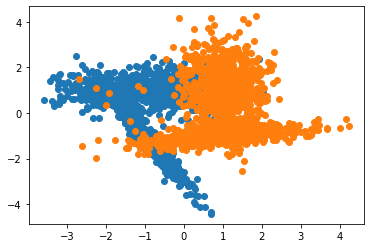

In [332]:
# create scatter plot for samples from each class
for class_value in range(len(unique(class_labels))):
    # get row indexes for samples with this class
    row_ix = np.where(class_labels == class_value)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

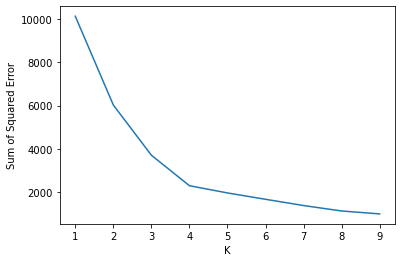

In [354]:
get_elbow_plot(data_values, x_col='x', y_col='y', min_k=1, max_k=10)

#### K-means

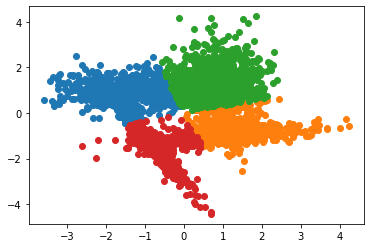

In [365]:
kmeans_model = KMeans(n_clusters=4, init='k-means++') # set k to whatever makes sense for your data
kmeans_model.fit(data_values)
kmeans_clusters = kmeans_model.predict(data_values)

# create scatter plot for samples from each cluster
for cluster in unique(kmeans_clusters):
    # get row indexes for samples with this cluster
    row_ix = np.where(kmeans_clusters == cluster)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

#### DBSCAN

Found 4 clusters


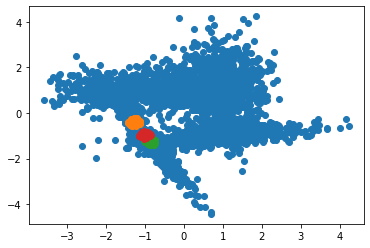

In [370]:
dbscan_model = DBSCAN(eps=0.1, min_samples = 29)
# dbscan_model = DBSCAN(eps=0.3, min_samples=8)
dbscan_clusters = dbscan_model.fit_predict(data_values)

print(f'Found {len(unique(dbscan_clusters))} clusters')
# create scatter plot for samples from each cluster
for cluster in unique(dbscan_clusters):
    # get row indexes for samples with this cluster
    row_ix = np.where(dbscan_clusters == cluster)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

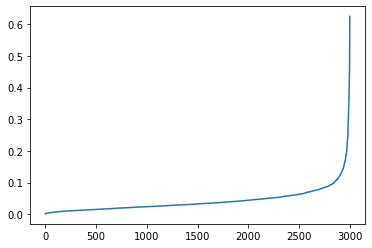

In [367]:
neighbors = NearestNeighbors(n_neighbors=11)
neighbors_fit = neighbors.fit(data_values)
distances, indices = neighbors_fit.kneighbors(data_values)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

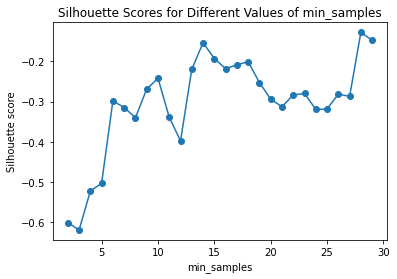

In [368]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

# Calculate silhouette scores for different values of min_samples
min_samples_range = range(2, 30)
silhouette_scores = []
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=0.1, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data_values)
    if len(set(dbscan_labels)) > 1:
        silhouette_scores.append(silhouette_score(data_values, dbscan_labels))
    else:
        silhouette_scores.append(-1)

# Plot the silhouette scores for different values of min_samples
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scores for Different Values of min_samples')
plt.show()

In [348]:
clustering = DBSCAN(eps=0.1, min_samples=4).fit(data_values)

#Storing the labels formed by the DBSCAN
labels = clustering.labels_

#Computing "the Silhouette Score"
print("Silhouette Coefficient:", metrics.silhouette_score(data_values, labels))

Silhouette Coefficient: -0.522313673607013


#### Some other algorithm....

Found 2 clusters


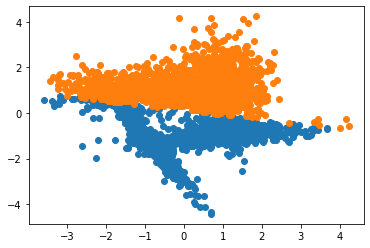

In [371]:
from sklearn.cluster import MeanShift
# define the model
model = MeanShift()
data = data_values

# fit model and predict clusters
clusters = model.fit_predict(data)

# retrieve unique clusters
uniq_clusters = np.unique(clusters)
print(f'Found {len(uniq_clusters)} clusters')

# create scatter plot for samples from each cluster
for cluster in uniq_clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(clusters == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])

plt.show()

In [364]:
print("Hello")

Hello


Found 4 clusters


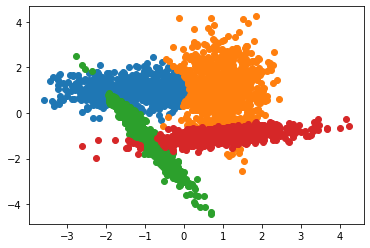

In [374]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=4)

data = data_values

# fit the model
model.fit(data)

# assign a cluster to each example
clusters = model.predict(data)

# retrieve unique clusters
uniq_clusters = np.unique(clusters)
print(f'Found {len(uniq_clusters)} clusters')

# create scatter plot for samples from each cluster
for cluster in uniq_clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(clusters == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])

plt.show()

Found 4 clusters


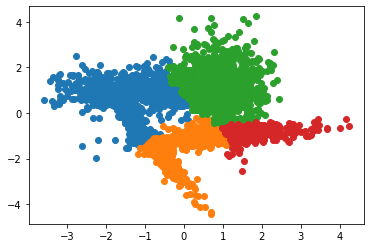

In [376]:
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
clusters = model.fit_predict(data)

# retrieve unique clusters
uniq_clusters = np.unique(clusters)
print(f'Found {len(uniq_clusters)} clusters')

# create scatter plot for samples from each cluster
for cluster in uniq_clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(clusters == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])

plt.show()